In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score



/home/aaron/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv('train_data.csv',index_col = 0)
test_kaggle = pd.read_csv('test_kaggle.csv',index_col=0)

In [3]:
train_data.columns

Index(['person', 'label', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean', 'vio_mas_de_5_veces', 'vio_color_mas_vendido',
       'returns_por_persona_mean', 'solicito_brand_listing',
       'productos_vistos_mean', 'busca_palabra_popular', '128GB', '16GB',
       '256GB', '32GB', '4GB', '512MB', '64GB', '8GB', 'periodo_y',
       'ad campaign hit_mean_y', 'brand listing_mean_y', 'checkout_mean_y',
       'conversion_mean_y', 'generic listing_mean_y', 'lead_mean_y',
       'search engine hit_mean_y', 'searched products_mean_y',
       'staticpage_mean_y', 'viewed product_mean_y', 'visited site_mean_y',
       'tiempo_ultima_conversion', 'timestamp_x', 'tiempo_ultimo_checkout',
       'timestamp_y', 'tiempo_ultima_visita', 'timestamp_x.1',
       'tiempo_ultimo_lead', 'tiempo_entre_conversiones_mean_log_x',
       'timestamp_y.

In [4]:
features = ['Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_jue', 'visitas_vier',
       'conversiones_mean', 'vio_mas_de_5_veces', 'vio_color_mas_vendido',
       'returns_por_persona_mean', 'solicito_brand_listing',
       'productos_vistos_mean', '128GB',
       '16GB', '256GB', '32GB', '4GB', '512MB', '64GB', '8GB', 'periodo_y',
       'ad campaign hit_mean_y', 'brand listing_mean_y', 'checkout_mean_y',
       'conversion_mean_y', 'generic listing_mean_y', 'lead_mean_y',
       'search engine hit_mean_y', 'searched products_mean_y',
       'staticpage_mean_y', 'viewed product_mean_y', 'visited site_mean_y',
       'tiempo_ultima_conversion','tiempo_ultimo_checkout','tiempo_ultima_visita','tiempo_ultimo_lead','vio_producto_popular','Samsung', 'tiempo_entre_conversion_checkout', 'checkout',
       'conversion', 'proporcion','cant_conversiones_ultimo_periodo','dias_desde_ultimo_evento']

In [5]:
X = train_data[features]
Y = train_data['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [6]:
kfold = KFold(n_splits=10)

In [9]:
mejor_score = 0
for train, test in kfold.split(X_train, Y_train):
    train_datas = train_data.iloc[train]
    test_datas = train_data.iloc[test]
    
    X_train_data = train_datas[features]
    Y_train_data = train_datas['label']
    
    X_test_data = test_datas[features]
    Y_test_data = test_datas['label']
    
    xgbRegressor.fit(X_train_data,Y_train_data)
    print(roc_auc_score(Y_test_data,xgbRegressor.predict(X_test_data)))
    if (roc_auc_score(Y_test_data, xgbRegressor.predict(X_test_data))>mejor_score):
        mejor_score = roc_auc_score(Y_test_data,xgbRegressor.predict(X_test_data))
        X_train_optimo = X_train_data
        Y_train_optimo = Y_train_data
        X_test_optimo = X_test_data
        Y_test_optimo = Y_test_data

0.8591262370263095
0.8510475977819956
0.8707886307011745
0.8644985465116279
0.8488033943554538
0.8534236100833703
0.8658371472158657
0.8454590347923681
0.8873936255619781
0.8955623795761078


In [10]:
params = {'objective':['binary:logistic'],'colsample_bytree': [0.5,.6,.7,.8,.9,1.0], 'learning_rate': [.07,.075,.08,.085,.09,.095,1.0],
                'max_depth' : [1,2,3,4,5,6,7,8,9,10], 'n_estimators' : [80,85,90,95,100],'seed':[123]}

In [11]:
cv = GridSearchCV(estimator=xgb.XGBRegressor(),param_grid=params,scoring='roc_auc',cv=3)

In [12]:
dmatrix = xgb.DMatrix(data=X_train_optimo[features],label=Y_train_optimo,feature_names=features)

In [ ]:
cv.fit(X_train_optimo,Y_train_optimo)

In [16]:
cv.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [8]:
xgbRegressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=1, learning_rate=0.075,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=95, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.8, seed=15, silent=True,
       subsample=0.8)



In [81]:
#params = {'objective':'binary:logistic','colsample_bytree': 0.5, 'learning_rate': 1.0,
                #'max_depth' : 10, 'n_estimators' : 20,'seed':123}

#xgb.cv(dtrain=dmatrix,params=params)

In [428]:
xgbRegressor.fit(X_train_optimo,Y_train_optimo)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=1, learning_rate=0.075,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=95, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.8, seed=15, silent=True,
       subsample=0.8)

In [429]:
roc_auc_score(Y_test_optimo,xgbRegressor.predict(X_test_optimo))

0.8955623795761078

In [371]:
xg_reg = xgb.train(params={'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
'colsample_bytree':1, 'gamma':1,'learning_rate':0.075, 'max_delta_step':0,
'max_depth':4, 'min_child_weight':1, 'n_estimators':95,
'n_jobs':1, 'objective':'binary:logistic', 'random_state':0,
'reg_alpha':0,'reg_lambda':1, 'scale_pos_weight':0.8,
'silent':True, 'subsample':0.8}, dtrain=dmatrix, num_boost_round=10)

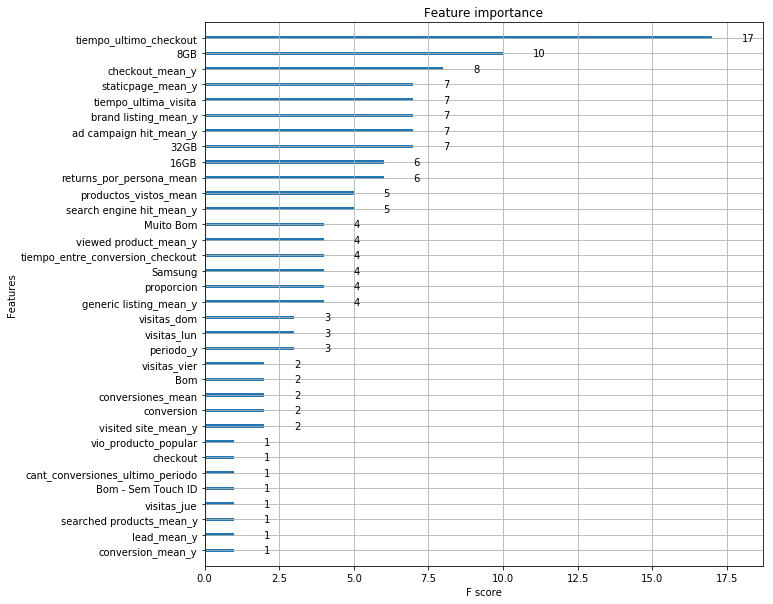

In [372]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Test Kaggle

In [373]:
test_kaggle['prediction'] = xgbRegressor.predict(test_kaggle[features])

In [374]:
submit_kaggle = pd.DataFrame({'person':test_kaggle['person'],'label':test_kaggle['prediction']})

In [375]:
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 0.0 if x < 0.0 else x)
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 1.0 if x > 1.0 else x)

In [376]:
submit_kaggle.reset_index(inplace = True)
submit_kaggle.drop(columns='index',inplace=True)
submit_kaggle.set_index(keys='person',inplace=True)

In [377]:
submit_kaggle.to_csv('submit_kaggle.csv')